# Global Terrorism Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings("ignore")

In [2]:
import plotly
import plotly.express as px
import plotly.io as pio

In [3]:
df = pd.read_csv("C:\R\gtd1993_0221distcsv.csv", encoding = 'latin1', low_memory=False)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,199301010001,1993,1,1,NaN,0,NaN,603,United Kingdom,8,...,The Red Hand Commandos are a Northern Irish Lo...,"John Mullin, Two Men Injured in Shootings by ...","Two Wounded in Belfast Murder Bid, The Heral...","Tim Kelsey, Loyalists claim more victims than...",CETIS,0,0,1,1,NaN
1,199301010002,1993,1,1,NaN,0,NaN,60,Egypt,10,...,NaN,"Edward F. Mickolus, Terrorism, 1992-1995: A Ch...",NaN,NaN,CETIS,-9,-9,1,1,NaN
2,199301030001,1993,1,3,NaN,0,NaN,186,Sri Lanka,6,...,The soldiers represented the first victims of ...,Tigers kill two soldiers  first victims in N...,NaN,NaN,CETIS,0,0,0,0,NaN
3,199301030002,1993,1,3,NaN,0,NaN,97,Israel,10,...,Haim Nahmani had arranged to meet a HAMAS info...,HAMAS militant kills Israeli intelligence age...,"Agent Killed in Palestinian Attack, The Asso...","Jonathan Ferziger, Police Search for Killer o...",CETIS,1,0,0,1,NaN
4,199301030003,1993,1,3,NaN,0,NaN,97,Israel,10,...,NaN,"Agent Killed in Palestinian Attack, The Asso...",NaN,NaN,CETIS,-9,-9,0,-9,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
743,199312280002,1993,12,28,NaN,0,NaN,159,Peru,3,...,This is one of 2 related attacks (cf. 19931228...,"Police Station, Funeral Home are Bombed are B...","Guerillas Hit Hard at Capital of Peru, The R...",NaN,CETIS,-9,-9,0,-9,NaN
744,199312300001,1993,12,30,NaN,0,NaN,603,United Kingdom,8,...,This is one of 3 related attacks (cf. 19931230...,"Deric Henderson, Troops Escape Injury in Land...",NaN,NaN,CETIS,0,0,1,1,NaN
745,199312300002,1993,12,30,NaN,0,NaN,603,United Kingdom,8,...,This is one of 3 related attacks (cf. 19931230...,"Deric Henderson, Troops Escape Injury in Land...",NaN,NaN,CETIS,0,0,1,1,NaN
746,199312300003,1993,12,30,NaN,0,NaN,603,United Kingdom,8,...,This is one of 3 related attacks (cf. 19931230...,Police Think IRA To Blame for Wave of Belfast...,NaN,NaN,CETIS,0,0,1,1,NaN
747,199312300004,1993,12,30,NaN,0,NaN,183,South Africa,11,...,NaN,"De Klerk condemns ""barbaric"" attack on tavern...",NaN,NaN,CETIS,-9,-9,0,-9,NaN


In [6]:
df = df[["iyear","imonth","iday","country","country_txt","region_txt","city","success","attacktype1_txt","nkill","propvalue","targtype1_txt","latitude","gname","longitude","targsubtype1_txt","target1","weaptype1_txt","weapdetail"]]

In [7]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region_txt',
       'city', 'success', 'attacktype1_txt', 'nkill', 'propvalue',
       'targtype1_txt', 'latitude', 'gname', 'longitude', 'targsubtype1_txt',
       'target1', 'weaptype1_txt', 'weapdetail'],
      dtype='object')

In [8]:
df.rename (columns = {'iyear': 'Year', "imonth": "Month","iday":"Day", "country":"Country_no","country_txt":"Country", "region_txt": "Region","city":"City", "propvalue":"property_value", "attacktype1_txt": "Attack_type", "targtype1_txt": "Target_type", "gname": "group_name","targsubtypel_txt":"Target_sub_type", "target1":"Target", "nkill":"no_of_kills","weaptypel_txt": "Weapon_type", "weapdetail":"Weapon_detail"}, inplace = True)


In [9]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country_no            0
Country               0
Region                0
City                  0
success               1
Attack_type           0
no_of_kills          16
property_value      724
Target_type           0
latitude            747
group_name            0
longitude           747
targsubtype1_txt    747
Target                0
weaptype1_txt         0
Weapon_detail       586
dtype: int64

Graphs

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from subprocess import check_output

In [11]:
terror=pd.read_csv('C:/R/gtd1993_0221distcsv.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1993,1,1,United Kingdom,Western Europe,Belfast,NaN,NaN,Armed Assault,0.0,2.0,Private Citizens in Belfast,01/01/1993: Armed gunmen of the Red Hand Comma...,Red Hand Commandos,Private Citizens & Property,Firearms,In retaliation for an Irish Republican Army mu...,2.0
1,1993,1,1,Egypt,Middle East & North Africa,Luxor,NaN,NaN,Armed Assault,0.0,0.0,Tourist buses driving from Luxor to Cairo,01/01/1993: Suspected Muslim extremists attack...,Other,Transportation,Firearms,Unknown,0.0
2,1993,1,3,Sri Lanka,South Asia,Vavuniya,NaN,NaN,Armed Assault,2.0,0.0,Sri Lankan Military troops,01/03/1993: The Liberation Tigers of Tamil Eel...,Liberation Tigers of Tamil Eelam (LTTE),Military,Firearms,Unknown,2.0


In [12]:
terror.isnull().sum()

Year             0
Month            0
Day              0
Country          0
Region           0
city             0
latitude       747
longitude      747
AttackType       0
Killed          16
Wounded         41
Target           0
Summary          0
Group            0
Target_type      0
Weapon_type      0
Motive           3
casualities     42
dtype: int64

In [13]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: United Kingdom
Regions with Highest Terrorist Attacks: Western Europe
Maximum people killed in an attack are: 970.0 that took place in Sri Lanka


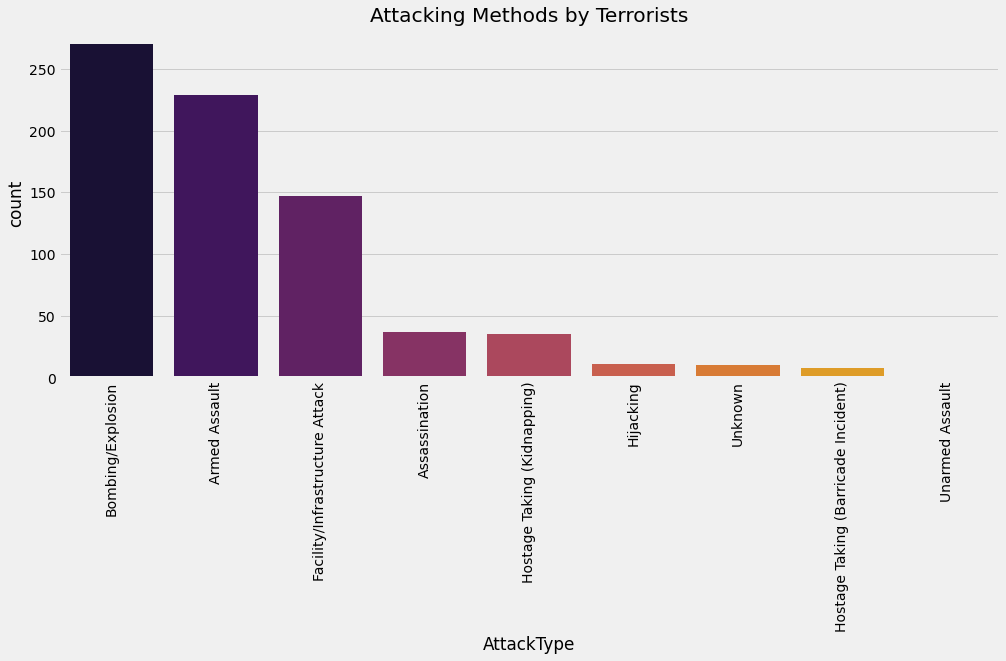

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

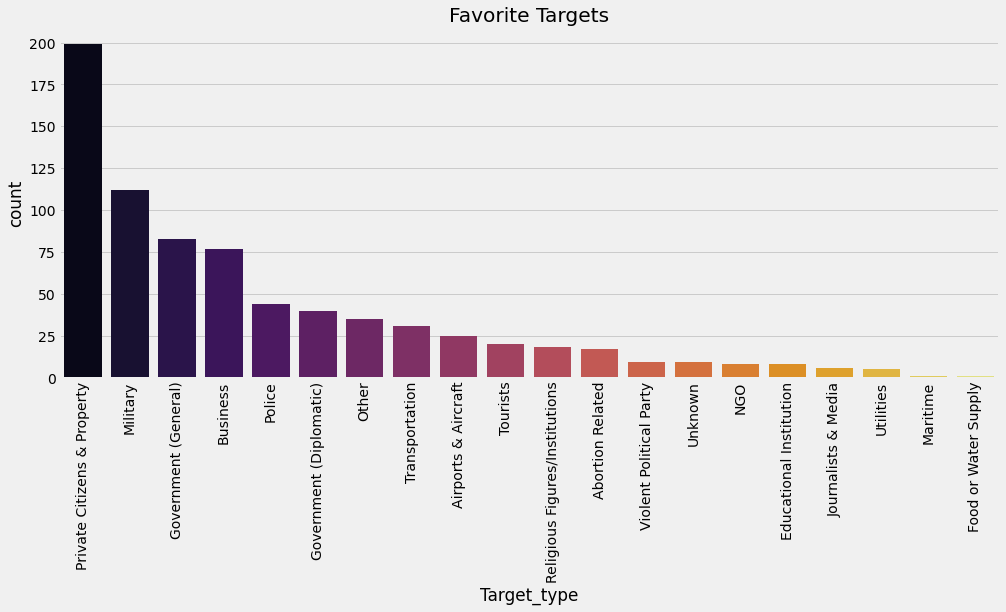

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

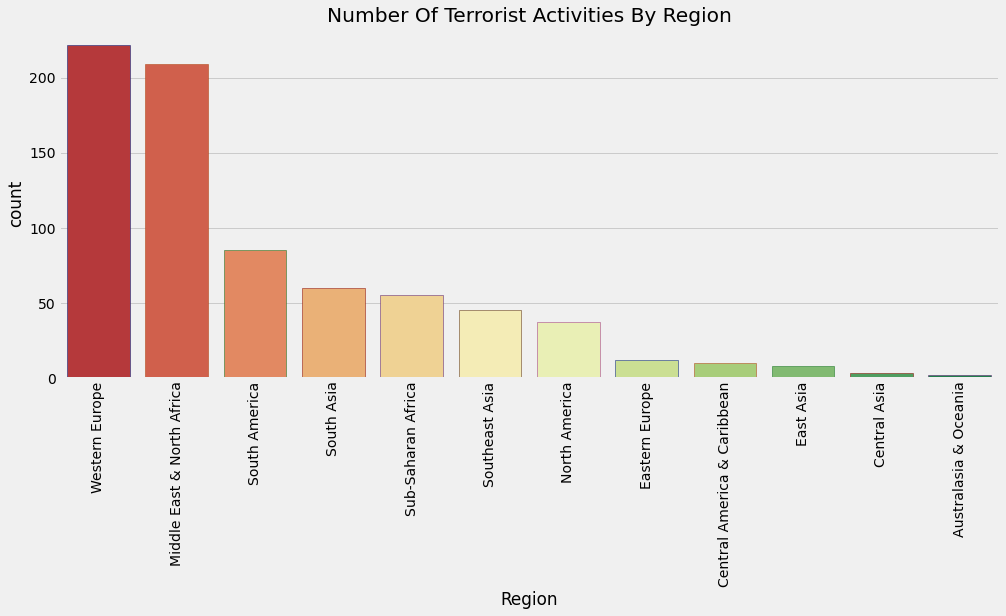

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

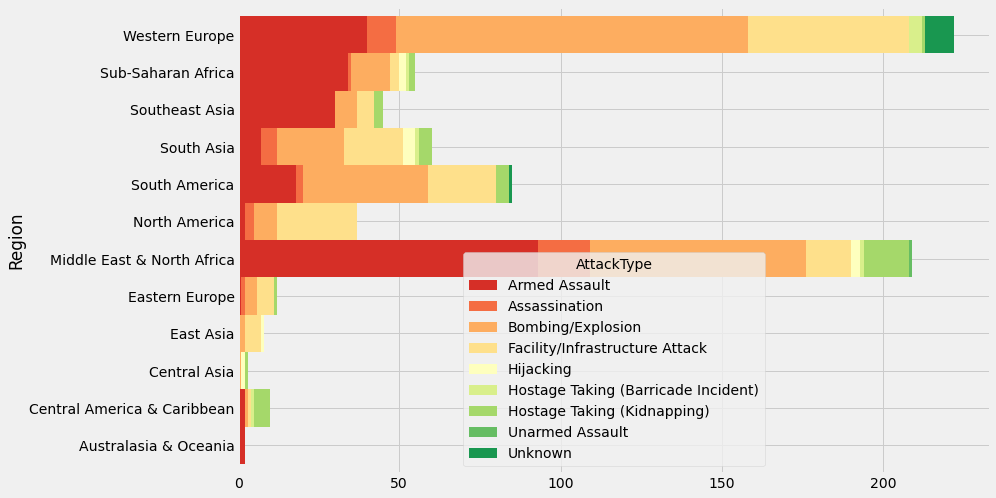

In [17]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

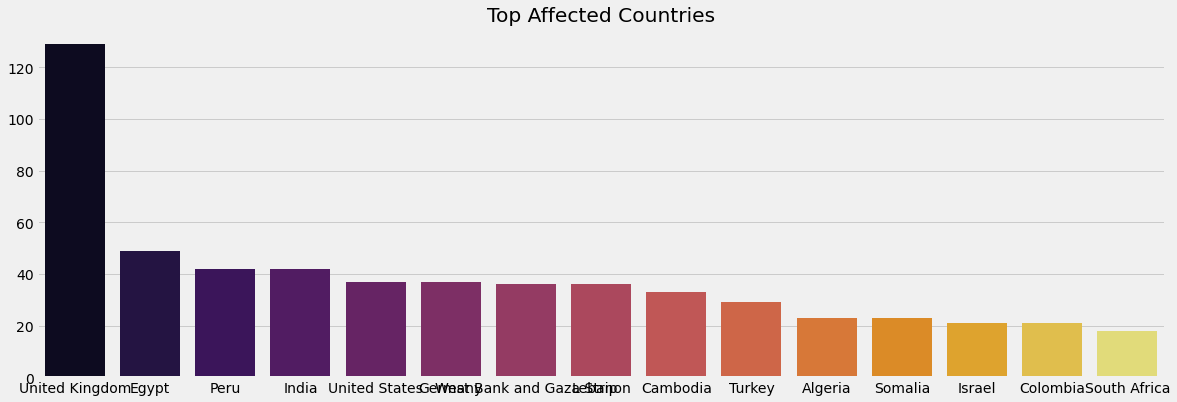

In [18]:
plt.subplots(figsize=(18,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

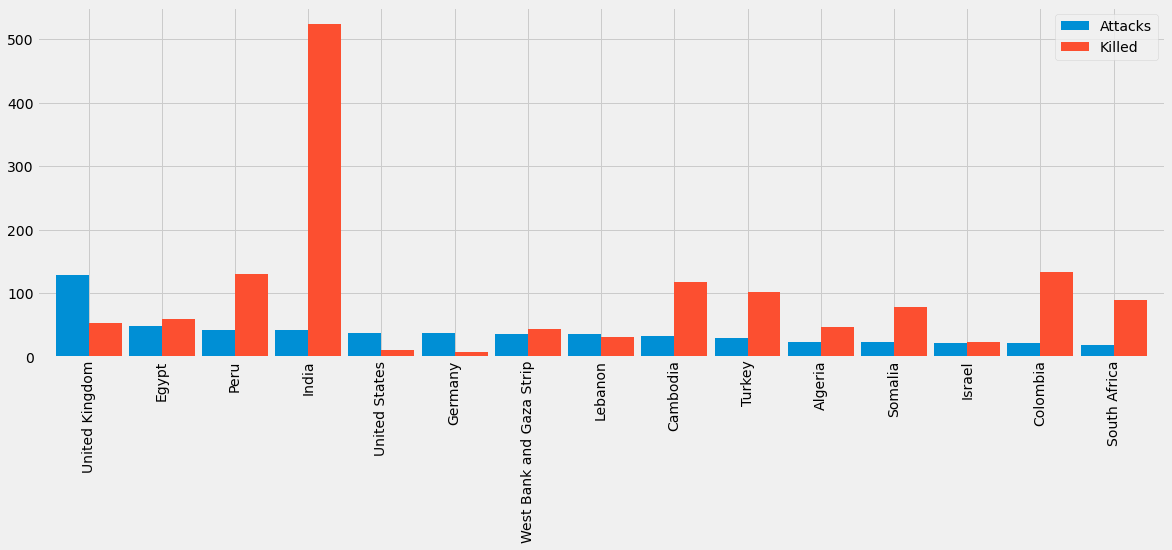

In [19]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

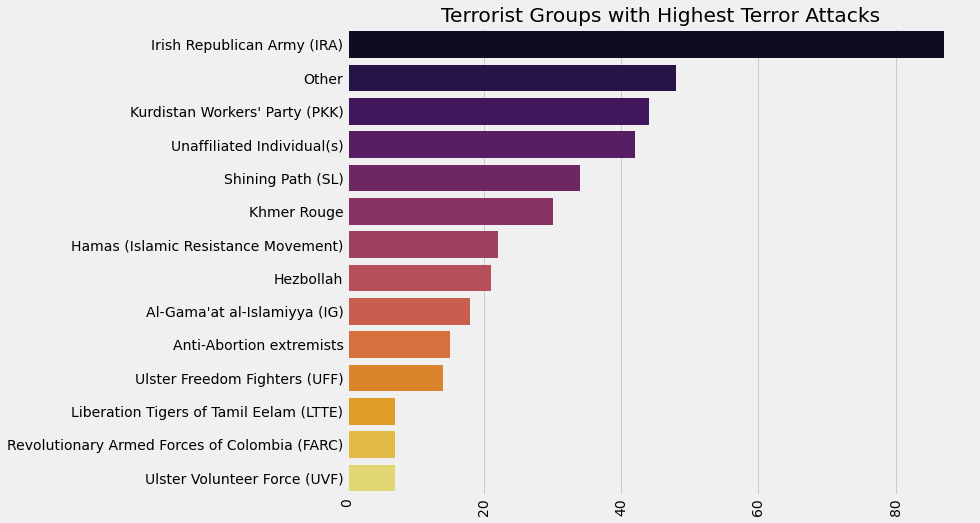

In [20]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()


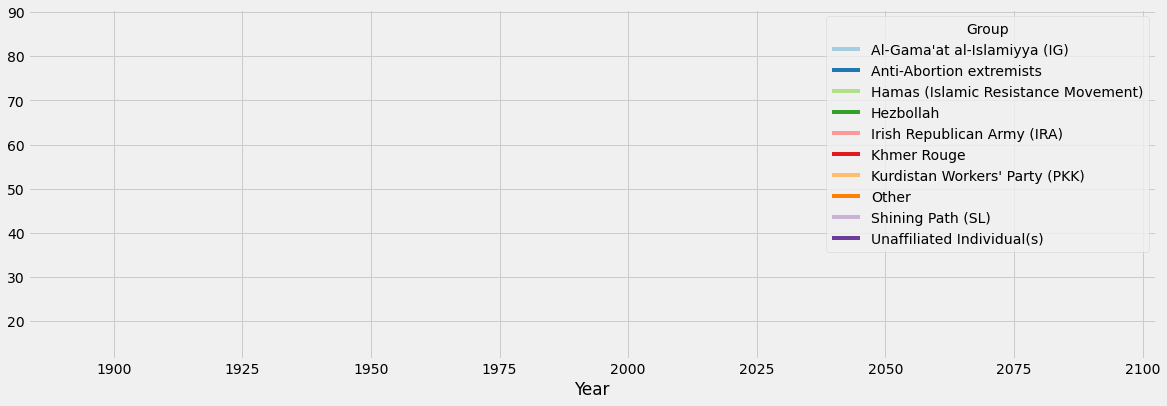

In [21]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()